In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## WORKING WITH CODE

In [2]:
# numpy the most popular Python library for array manipulation and numberi computing
# matplotlib the most popular visualization library in the Python ecosystem 

In [3]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

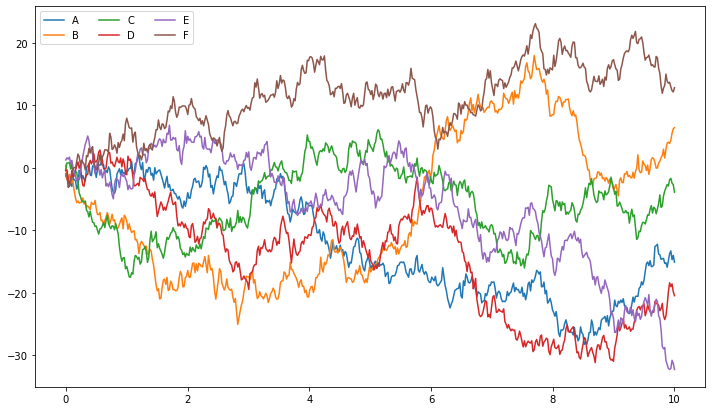

In [4]:
plt.figure(figsize=(12,7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=3, loc='upper left')


## INTERACTING WITH DATA

In [5]:
### got API tokens

In [6]:
import requests
import pandas as pd



In [7]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [8]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2021-11-19 20:04:25.511292')

In [9]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [10]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

### Bitcoin:

In [11]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-11-19 21:00:00,58118.44,58200.00,57769.11,57850.59,158.297123,9.173415e+06
2021-11-19 22:00:00,57846.25,57993.13,57578.24,57850.24,142.800518,8.248375e+06
2021-11-19 23:00:00,57876.80,58048.27,57764.71,57866.95,63.663146,3.688138e+06
2021-11-20 00:00:00,57877.08,58185.53,57788.57,58128.55,64.113907,3.717182e+06
2021-11-20 01:00:00,58126.46,58601.00,58013.62,58313.74,62.785842,3.665754e+06


<AxesSubplot:xlabel='CloseTime'>

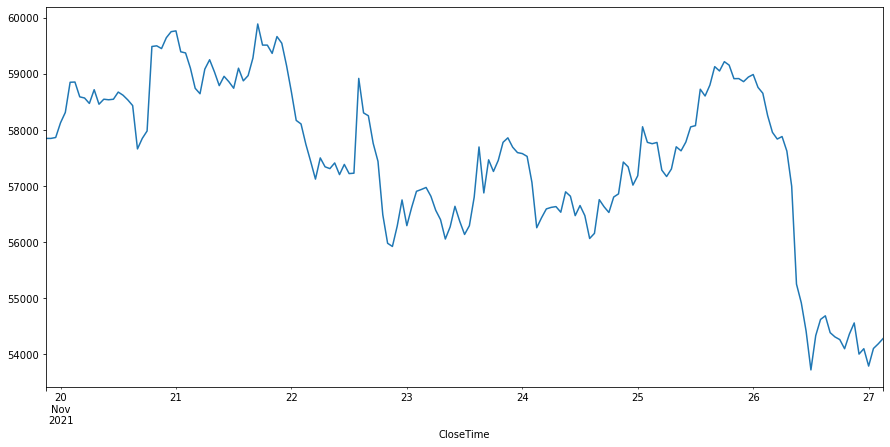

In [12]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [13]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-11-19 21:00:00,4298.20,4314.14,4268.30,4273.93,833.582085,3.572994e+06
2021-11-19 22:00:00,4272.82,4282.25,4255.00,4277.58,1153.342413,4.920635e+06
2021-11-19 23:00:00,4282.11,4311.81,4277.05,4284.03,318.026174,1.365107e+06
2021-11-20 00:00:00,4284.31,4306.72,4274.28,4300.36,284.168718,1.218957e+06
2021-11-20 01:00:00,4302.95,4329.74,4288.62,4301.47,1990.247361,8.595488e+06


<AxesSubplot:xlabel='CloseTime'>

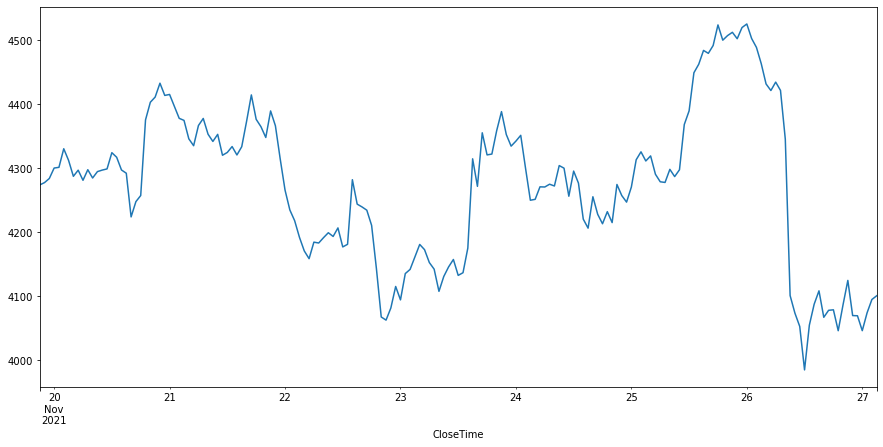

In [14]:
eth['ClosePrice'].plot(figsize=(15, 7))

### Bonus: Dynamic plots with Bokeh
We've also included Bokeh as part of this main distribution. Bokeh is a plotting library that generates interactive plots, that can be manipulated right within your browser.

We first need to import the libraries:

In [15]:
#Bokeh has interactive visualizations 

In [16]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [17]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

### Part 4: Exporting to Excel
We're now ready to generate an Excel file from the downloaded prices. Working with Excel and other formats (like CSV or JSON) is extremely simple in Jupyter Lab (thanks to pandas and Python). Our first step will be to create an "Excel writer", a component from the pandas package:

In [18]:
writer = pd.ExcelWriter('cryptos.xlsx')

#### We'll now write both our Bitcoin and Ether data as separate sheets:

In [19]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [20]:
eth.to_excel(writer, sheet_name='Ether')

In [21]:
writer.save()